In [1]:
%reload_ext autoreload
%autoreload 2

import argparse
import re
from pathlib import Path
import pandas as pd
import os
import json
from build_stimulus_table import build_stimulus_table
from sample_experiment import generate_profile, generate_debug_profile, save_profile

In [2]:
# Paths
WORK = Path(os.environ.get("WORK", Path.cwd()))
DATA = WORK / "color-concept-entanglement" / "data"
OBJ_IMG_ROOT = DATA / "color_images" / "gpt-4o"

## Create stimulus table for each condition

### 1. Objects with color priors

In [3]:
df_priors = build_stimulus_table(
    dataset_root=OBJ_IMG_ROOT / "image_priors",
    stimulus_type="correct_prior",
    data_root=DATA,
)
# Drop images colored with black
df_priors = df_priors[df_priors["target_color"] != "black"]

df_priors.to_csv(DATA / "prolific_stimuli" / f"stimulus_table_image_priors.csv", index=False)
display(df_priors)
display(df_priors.value_counts("target_color"))

,object,stimulus_type,target_color,variant_region,percent_colored,mode,variant_label,image_path
0,Band Aid,correct_prior,pink,BG,0,seq,BG 0% (seq),color_images/gpt-4o/image_priors/Band_Aid_1_e7...
1,Band Aid,correct_prior,pink,BG,1,seq,BG 1% (seq),color_images/gpt-4o/image_priors/Band_Aid_1_e7...
2,Band Aid,correct_prior,pink,BG,2,seq,BG 2% (seq),color_images/gpt-4o/image_priors/Band_Aid_1_e7...
3,Band Aid,correct_prior,pink,BG,3,seq,BG 3% (seq),color_images/gpt-4o/image_priors/Band_Aid_1_e7...
4,Band Aid,correct_prior,pink,BG,4,seq,BG 4% (seq),color_images/gpt-4o/image_priors/Band_Aid_1_e7...
...,...,...,...,...,...,...,...,...
8327,worm,correct_prior,brown,FG,60,seq,FG 60% (seq),color_images/gpt-4o/image_priors/worm_1_69c913...
8328,worm,correct_prior,brown,FG,70,seq,FG 70% (seq),color_images/gpt-4o/image_priors/worm_1_69c913...
8329,worm,correct_prior,brown,FG,80,seq,FG 80% (seq),color_images/gpt-4o/image_priors/worm_1_69c913...
8330,worm,correct_prior,brown,FG,90,seq,FG 90% (seq),color_images/gpt-4o/image_priors/worm_1_69c913...


target_color
brown     2974
green     1176
grey      1168
red       1128
blue       584
orange     546
yellow     462
pink       168
purple     126
Name: count, dtype: int64

In [ ]:
grey_df = df_priors[(df_priors["target_color"] == "grey") & (df_priors["variant_label"] == "FG 90% (seq)")]
display(grey_df)

,object,stimulus_type,target_color,variant_region,percent_colored,mode,variant_label,image_path
376,Norwegian elkhound,correct_prior,grey,FG,90,seq,FG 90% (seq),color_images/gpt-4o/image_priors/Norwegian_elk...
418,Old English sheepdog,correct_prior,grey,FG,90,seq,FG 90% (seq),color_images/gpt-4o/image_priors/Old_English_s...
540,Sealyham terrier,correct_prior,grey,FG,90,seq,FG 90% (seq),color_images/gpt-4o/image_priors/Sealyham_terr...
1716,brick,correct_prior,grey,FG,90,seq,FG 90% (seq),color_images/gpt-4o/image_priors/brick_4_b7633...
2094,cannon,correct_prior,grey,FG,90,seq,FG 90% (seq),color_images/gpt-4o/image_priors/cannon_2_08ed...
2136,car wheel,correct_prior,grey,FG,90,seq,FG 90% (seq),color_images/gpt-4o/image_priors/car_wheel_2_0...
2472,cloud,correct_prior,grey,FG,90,seq,FG 90% (seq),color_images/gpt-4o/image_priors/cloud_3_29898...
2846,dalmatian,correct_prior,grey,FG,90,seq,FG 90% (seq),color_images/gpt-4o/image_priors/dalmatian_2_2...
3014,dingo,correct_prior,grey,FG,90,seq,FG 90% (seq),color_images/gpt-4o/image_priors/dingo_2_26a21...
3056,dolphin,correct_prior,grey,FG,90,seq,FG 90% (seq),color_images/gpt-4o/image_priors/dolphin_5_d7f...


Displaying: /mnt/lustre/work/eickhoff/esx061/color-concept-entanglement/data/color_images/gpt-4o/image_priors/Norwegian_elkhound_5_5d37b261_resized_grey/FG_090_seq.png


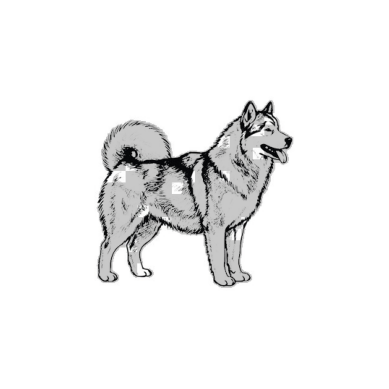

Displaying: /mnt/lustre/work/eickhoff/esx061/color-concept-entanglement/data/color_images/gpt-4o/image_priors/Old_English_sheepdog_4_51cd66d5_resized_grey/FG_090_seq.png


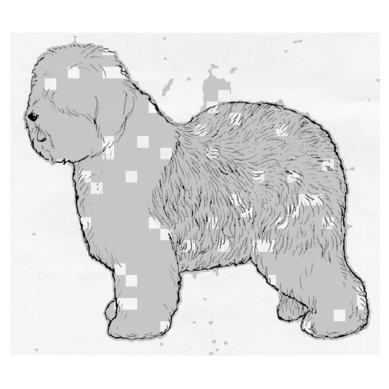

Displaying: /mnt/lustre/work/eickhoff/esx061/color-concept-entanglement/data/color_images/gpt-4o/image_priors/Sealyham_terrier_1_be54a4a0_resized_grey/FG_090_seq.png


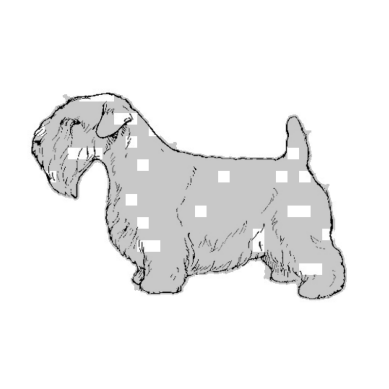

Displaying: /mnt/lustre/work/eickhoff/esx061/color-concept-entanglement/data/color_images/gpt-4o/image_priors/brick_4_b7633a9d_resized_grey/FG_090_seq.png


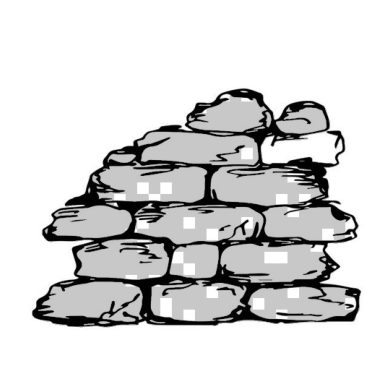

Displaying: /mnt/lustre/work/eickhoff/esx061/color-concept-entanglement/data/color_images/gpt-4o/image_priors/cannon_2_08ed4ed8_resized_grey/FG_090_seq.png


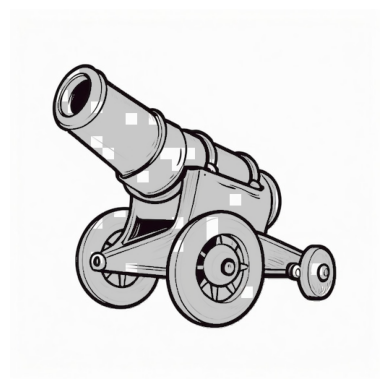

Displaying: /mnt/lustre/work/eickhoff/esx061/color-concept-entanglement/data/color_images/gpt-4o/image_priors/car_wheel_2_0f5627b5_resized_grey/FG_090_seq.png


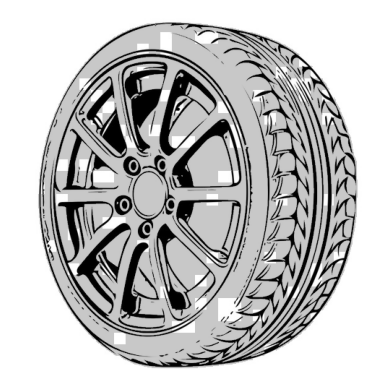

Displaying: /mnt/lustre/work/eickhoff/esx061/color-concept-entanglement/data/color_images/gpt-4o/image_priors/cloud_3_29898571_resized_grey/FG_090_seq.png


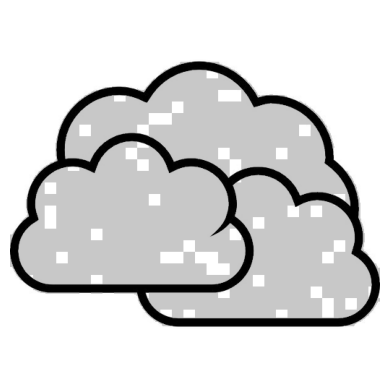

Displaying: /mnt/lustre/work/eickhoff/esx061/color-concept-entanglement/data/color_images/gpt-4o/image_priors/dalmatian_2_266c20b5_resized_grey/FG_090_seq.png


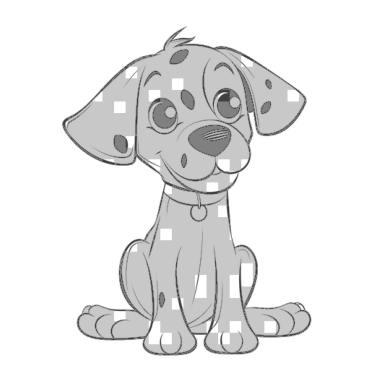

Displaying: /mnt/lustre/work/eickhoff/esx061/color-concept-entanglement/data/color_images/gpt-4o/image_priors/dingo_2_26a21c78_resized_grey/FG_090_seq.png


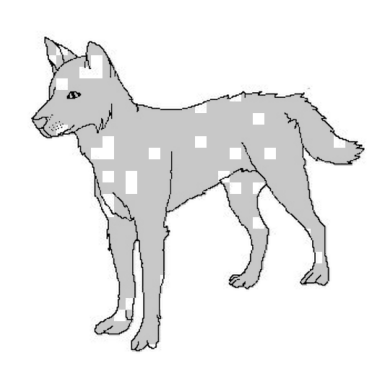

Displaying: /mnt/lustre/work/eickhoff/esx061/color-concept-entanglement/data/color_images/gpt-4o/image_priors/dolphin_5_d7fefaa3_resized_grey/FG_090_seq.png


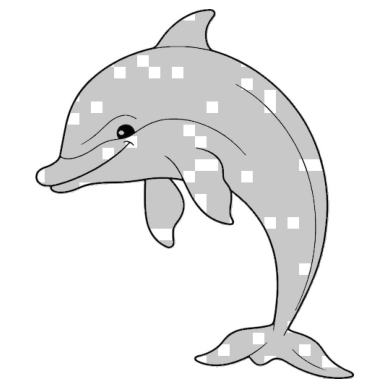

Displaying: /mnt/lustre/work/eickhoff/esx061/color-concept-entanglement/data/color_images/gpt-4o/image_priors/dove_1_22151e5f_resized_grey/FG_090_seq.png


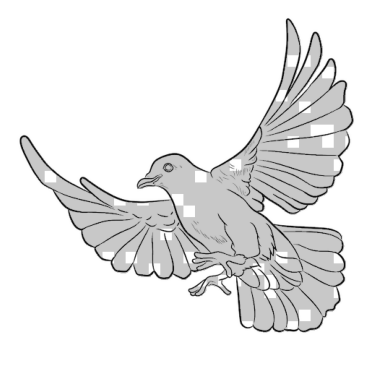

Displaying: /mnt/lustre/work/eickhoff/esx061/color-concept-entanglement/data/color_images/gpt-4o/image_priors/elephant_2_d9a9678b_resized_grey/FG_090_seq.png


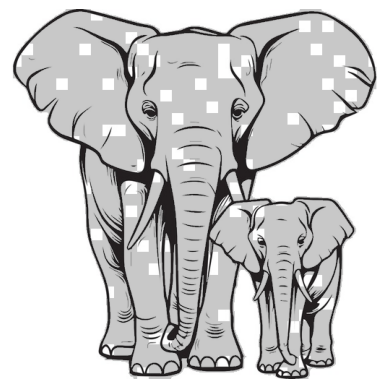

Displaying: /mnt/lustre/work/eickhoff/esx061/color-concept-entanglement/data/color_images/gpt-4o/image_priors/gasmask_2_6f8dba75_resized_grey/FG_090_seq.png


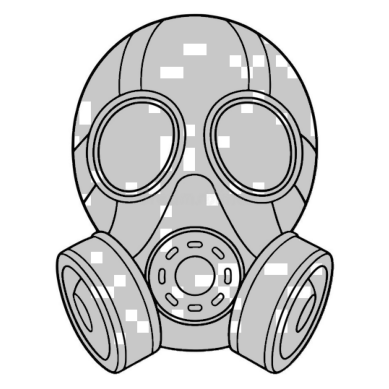

Displaying: /mnt/lustre/work/eickhoff/esx061/color-concept-entanglement/data/color_images/gpt-4o/image_priors/gorilla_3_bcd1ec66_resized_grey/FG_090_seq.png


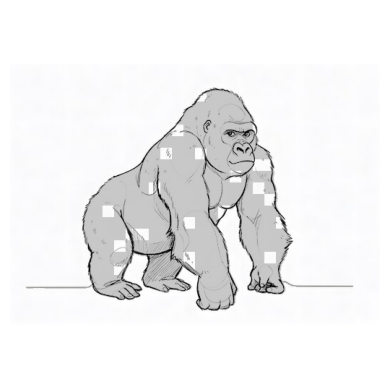

Displaying: /mnt/lustre/work/eickhoff/esx061/color-concept-entanglement/data/color_images/gpt-4o/image_priors/great_white_shark_4_c223edfe_resized_grey/FG_090_seq.png


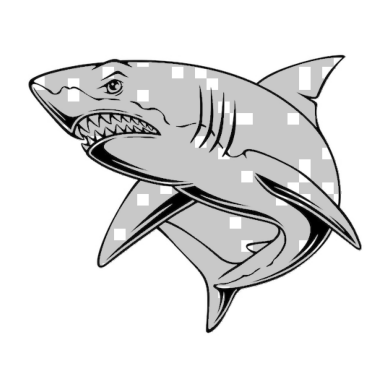

Displaying: /mnt/lustre/work/eickhoff/esx061/color-concept-entanglement/data/color_images/gpt-4o/image_priors/hare_2_4cbe00ed_resized_grey/FG_090_seq.png


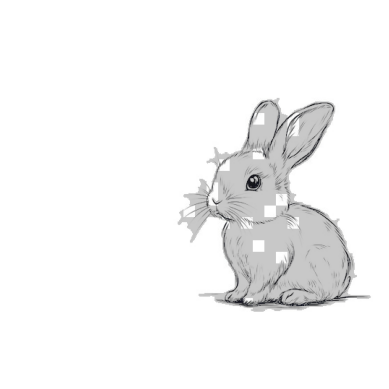

Displaying: /mnt/lustre/work/eickhoff/esx061/color-concept-entanglement/data/color_images/gpt-4o/image_priors/hippopotamus_3_8a2a39de_resized_grey/FG_090_seq.png


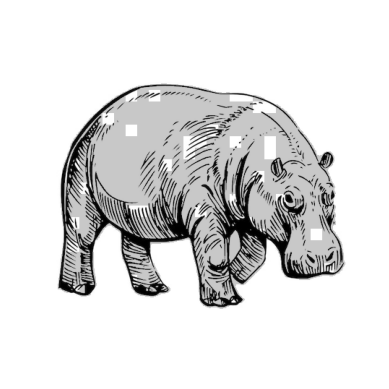

Displaying: /mnt/lustre/work/eickhoff/esx061/color-concept-entanglement/data/color_images/gpt-4o/image_priors/koala_4_ae2c3b57_resized_grey/FG_090_seq.png


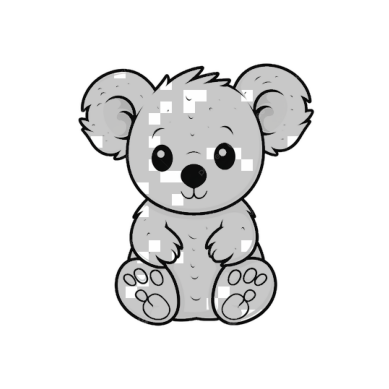

Displaying: /mnt/lustre/work/eickhoff/esx061/color-concept-entanglement/data/color_images/gpt-4o/image_priors/little_blue_heron_4_775a9164_resized_grey/FG_090_seq.png


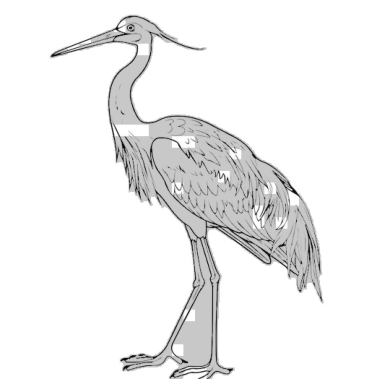

Displaying: /mnt/lustre/work/eickhoff/esx061/color-concept-entanglement/data/color_images/gpt-4o/image_priors/mouse_(computer)_2_df53ad98_resized_grey/FG_090_seq.png


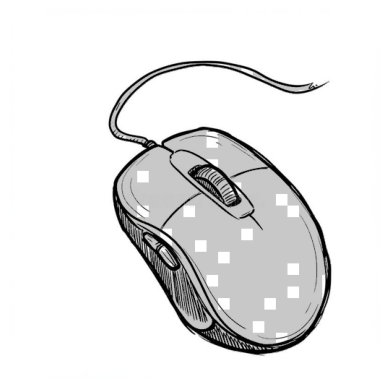

Displaying: /mnt/lustre/work/eickhoff/esx061/color-concept-entanglement/data/color_images/gpt-4o/image_priors/mouse_2_cf4ddb3c_resized_grey/FG_090_seq.png


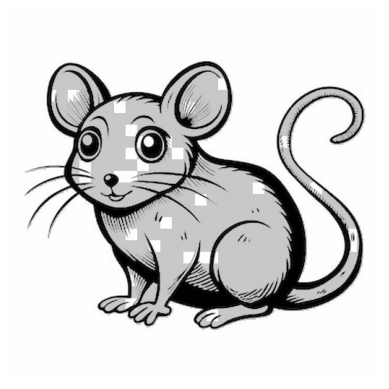

Displaying: /mnt/lustre/work/eickhoff/esx061/color-concept-entanglement/data/color_images/gpt-4o/image_priors/pigeon_4_61bf181e_resized_grey/FG_090_seq.png


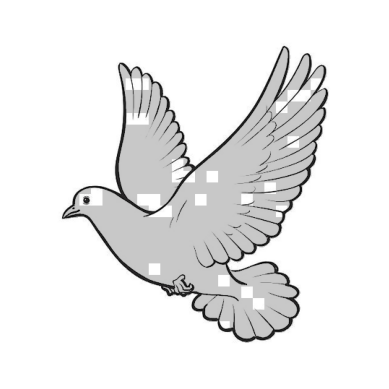

Displaying: /mnt/lustre/work/eickhoff/esx061/color-concept-entanglement/data/color_images/gpt-4o/image_priors/reflex_camera_1_bc049e04_resized_grey/FG_090_seq.png


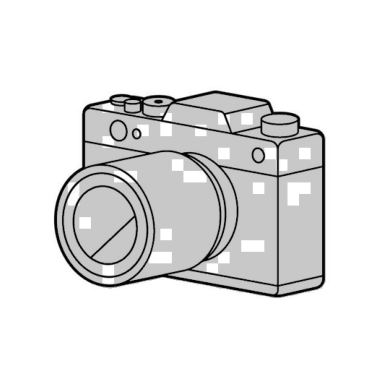

Displaying: /mnt/lustre/work/eickhoff/esx061/color-concept-entanglement/data/color_images/gpt-4o/image_priors/screw_2_f5051efb_resized_grey/FG_090_seq.png


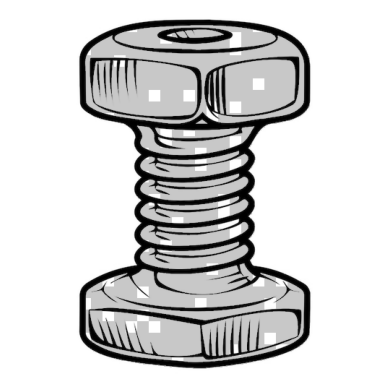

Displaying: /mnt/lustre/work/eickhoff/esx061/color-concept-entanglement/data/color_images/gpt-4o/image_priors/shark_5_3fe7d0c2_resized_grey/FG_090_seq.png


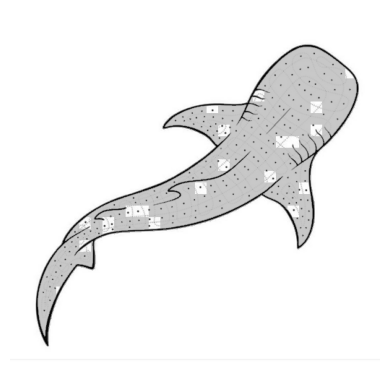

Displaying: /mnt/lustre/work/eickhoff/esx061/color-concept-entanglement/data/color_images/gpt-4o/image_priors/spoonbill_2_c0c043d5_resized_grey/FG_090_seq.png


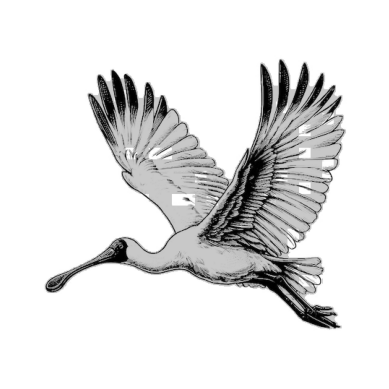

Displaying: /mnt/lustre/work/eickhoff/esx061/color-concept-entanglement/data/color_images/gpt-4o/image_priors/tiger_shark_4_92ee8a5f_resized_grey/FG_090_seq.png


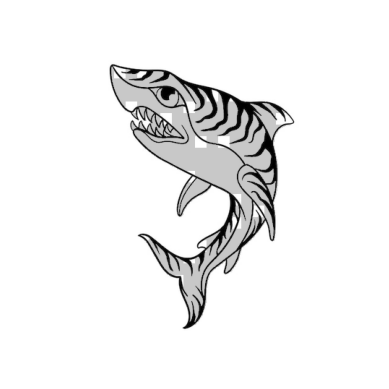

Displaying: /mnt/lustre/work/eickhoff/esx061/color-concept-entanglement/data/color_images/gpt-4o/image_priors/typewriter_4_0a946944_resized_grey/FG_090_seq.png


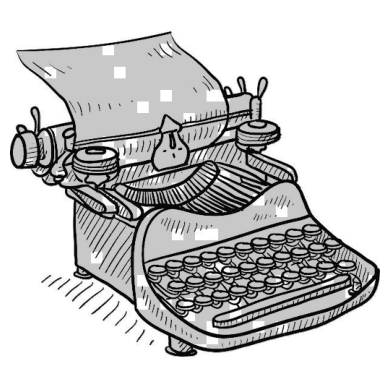

In [9]:
from PIL import Image
import matplotlib.pyplot as plt

# Loop through the DataFrame and display each image
for i, row in grey_df.iterrows():
    if row["image_path"]:  # Check if there is an image path
            image_path = DATA / row['image_path']
            print(f"Displaying: {image_path}")  # Print file name

            # Open and display the image
            try:
                image = Image.open(image_path)
                plt.figure()  # Create a new figure for each image
                plt.imshow(image)
                plt.axis("off")  # Hide axes
                #plt.title(f"{row['correct_answer']} {row['correct_object']} - Image {j+1}")  # Title with object, color, and number
                plt.show()  # Show the image
            except Exception as e:
                print(f"Error displaying {image_path}: {e}")

### 2. Objects with counterfact color

In [4]:
df_cf = build_stimulus_table(
    dataset_root=OBJ_IMG_ROOT / "counterfact",
    stimulus_type="counterfact",
    data_root=DATA,
)
# Drop images colored with black
df_cf = df_cf[df_cf["target_color"] != "black"]

df_cf.to_csv(DATA / "prolific_stimuli" / f"stimulus_table_counterfact.csv", index=False)
display(df_cf)
display(df_cf.value_counts("target_color"))

,object,stimulus_type,target_color,variant_region,percent_colored,mode,variant_label,image_path
0,Band Aid,counterfact,purple,BG,0,seq,BG 0% (seq),color_images/gpt-4o/counterfact/Band_Aid_1_e73...
1,Band Aid,counterfact,purple,BG,1,seq,BG 1% (seq),color_images/gpt-4o/counterfact/Band_Aid_1_e73...
2,Band Aid,counterfact,purple,BG,2,seq,BG 2% (seq),color_images/gpt-4o/counterfact/Band_Aid_1_e73...
3,Band Aid,counterfact,purple,BG,3,seq,BG 3% (seq),color_images/gpt-4o/counterfact/Band_Aid_1_e73...
4,Band Aid,counterfact,purple,BG,4,seq,BG 4% (seq),color_images/gpt-4o/counterfact/Band_Aid_1_e73...
...,...,...,...,...,...,...,...,...
8985,worm,counterfact,purple,FG,60,seq,FG 60% (seq),color_images/gpt-4o/counterfact/worm_1_69c913c...
8986,worm,counterfact,purple,FG,70,seq,FG 70% (seq),color_images/gpt-4o/counterfact/worm_1_69c913c...
8987,worm,counterfact,purple,FG,80,seq,FG 80% (seq),color_images/gpt-4o/counterfact/worm_1_69c913c...
8988,worm,counterfact,purple,FG,90,seq,FG 90% (seq),color_images/gpt-4o/counterfact/worm_1_69c913c...


target_color
purple    1672
pink      1672
blue      1296
green     1214
yellow    1048
red        834
orange     798
brown      456
Name: count, dtype: int64

### 3. Shapes

In [5]:
df_shapes = build_stimulus_table(
    dataset_root= DATA / "shapes" / "shape_colored",
    stimulus_type="shape",
    data_root=DATA,
)
# Drop images colored with black
df_shapes = df_shapes[df_shapes["target_color"] != "black"]

df_shapes.to_csv(DATA / "prolific_stimuli" / f"stimulus_table_shapes.csv", index=False)
display(df_shapes)
display(df_shapes.value_counts("target_color"))

,object,stimulus_type,target_color,variant_region,percent_colored,mode,variant_label,image_path
42,circle,shape,blue,BG,0,seq,BG 0% (seq),shapes/shape_colored/circle_v0_blue/BG_000_seq...
43,circle,shape,blue,BG,1,seq,BG 1% (seq),shapes/shape_colored/circle_v0_blue/BG_001_seq...
44,circle,shape,blue,BG,2,seq,BG 2% (seq),shapes/shape_colored/circle_v0_blue/BG_002_seq...
45,circle,shape,blue,BG,3,seq,BG 3% (seq),shapes/shape_colored/circle_v0_blue/BG_003_seq...
46,circle,shape,blue,BG,4,seq,BG 4% (seq),shapes/shape_colored/circle_v0_blue/BG_004_seq...
...,...,...,...,...,...,...,...,...
10495,triangle,shape,yellow,FG,60,seq,FG 60% (seq),shapes/shape_colored/triangle_v4_yellow/FG_060...
10496,triangle,shape,yellow,FG,70,seq,FG 70% (seq),shapes/shape_colored/triangle_v4_yellow/FG_070...
10497,triangle,shape,yellow,FG,80,seq,FG 80% (seq),shapes/shape_colored/triangle_v4_yellow/FG_080...
10498,triangle,shape,yellow,FG,90,seq,FG 90% (seq),shapes/shape_colored/triangle_v4_yellow/FG_090...


target_color
blue      1050
brown     1050
green     1050
grey      1050
orange    1050
pink      1050
purple    1050
red       1050
yellow    1050
Name: count, dtype: int64

## Create survey profiles

In [6]:
N_BASE_PROFILES = 37

profiles = []

for base_id in range(N_BASE_PROFILES):
    for introspection_pos in ["first", "last"]:

        profile = generate_profile(
            df_priors=df_priors,
            df_cf=df_cf,
            df_shapes=df_shapes,
            seed=base_id,
            introspection_position=introspection_pos,
        )

        profiles.append({
            "profile_id": f"{base_id}_{introspection_pos}",
            "base_id": base_id,
            "introspection_position": introspection_pos,
            "questions": profile,
        })

In [7]:
out_dir = DATA / "prolific_stimuli" / "profiles"
out_dir.mkdir(exist_ok=True)

for p in profiles:
    out_path = out_dir / f"profile_{p['profile_id']}.json"
    with open(out_path, "w") as f:
        json.dump(p, f, indent=2)

In [8]:
save_profile(
    generate_debug_profile(df_priors, df_shapes),
    out_dir / "debug_profile.json",
)
# test server.py with http://127.0.0.1:5000/?PROLIFIC_PID=DEBUG